# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 4, часть 2. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо оформить в виде $\LaTeX$ в markdown-ячейках. Иные способы (в т.ч. фотографии) не принимаются.
* Если вы не знаете $\LaTeX$, используйте ИИ-инструменты для оформления черновика решения. Примеры были показаны на лекции 2 по ИИ-инструментам.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. 
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `...`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задача 2 &mdash; 40 баллов.

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задача 3 &mdash; 80 баллов;
* Задача 4 &mdash; 50 баллов.

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [157]:
# Bot check

# HW_ID: fpmi_ad4_part2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [103]:
from typing import Tuple
import numpy as np
from sklearn import datasets

from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from torchvision.datasets import MNIST
from torchvision import transforms
from sklearn.metrics import accuracy_score
from time import time

import torch
import torch.nn as nn


...

sns.set(palette="Set2")
cm_bright = ListedColormap(["#FF3300", "#00CC66"])

В условии задания обозначены области, в которых запрещено использование ИИ-инструментов. Это не исчерпывающий список. Подробные правила можно найти <a href="https://thetahat.ru/courses/ai-rules">по ссылке на сайте</a>. В частности, запрещено применять ИИ-инструменты при решении теоретических частей задач, ответах на вопросы и написании выводов.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 2.

**При решении задачи запрещено пользоваться ИИ-инструментами,** но можно при оформлении решения.

Рассмотрим двухслойную полносвязную нейронную сеть, которая принимает на вход $x\in\mathbb{R}^d$ и возвращает $y\in\{0, 1\}$
$$y_\theta(x) = \sigma_2 \big( \sigma_1 \left( x^{\top} W_1 + b_1 \right) W_2 + b_2 \big),$$
где 
* $W_1 \in \mathbb{R}^{d \times h}, b_1 \in \mathbb{R}^{h}$ &mdash; параметры 1-го слоя,
* $W_2 \in \mathbb{R}^{h \times 1}, b_2 \in \mathbb{R}$ &mdash; параметры 2-го слоя,
* $\theta = (W_1, b_1, W_2, b_2)$ — все параметры нейросети,
* $\sigma_1(x) = \tanh x = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$ &mdash; гиперболический тангенс, функция активации 1-го слоя, применяется поэлементно,
* $\sigma_2(x) = \frac{1}{1 + e^{-x}}$ &mdash; логистическая сигмоида, функция активации 2-го слоя.

**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

*Для вставки изображения скопируйте его и вставьте в ячейку markdown с помощью `Ctrl+V`. Должно появится либо большое количество символов (Colab), либо что-то вроде `![image.png](attachment:image.png)`.*

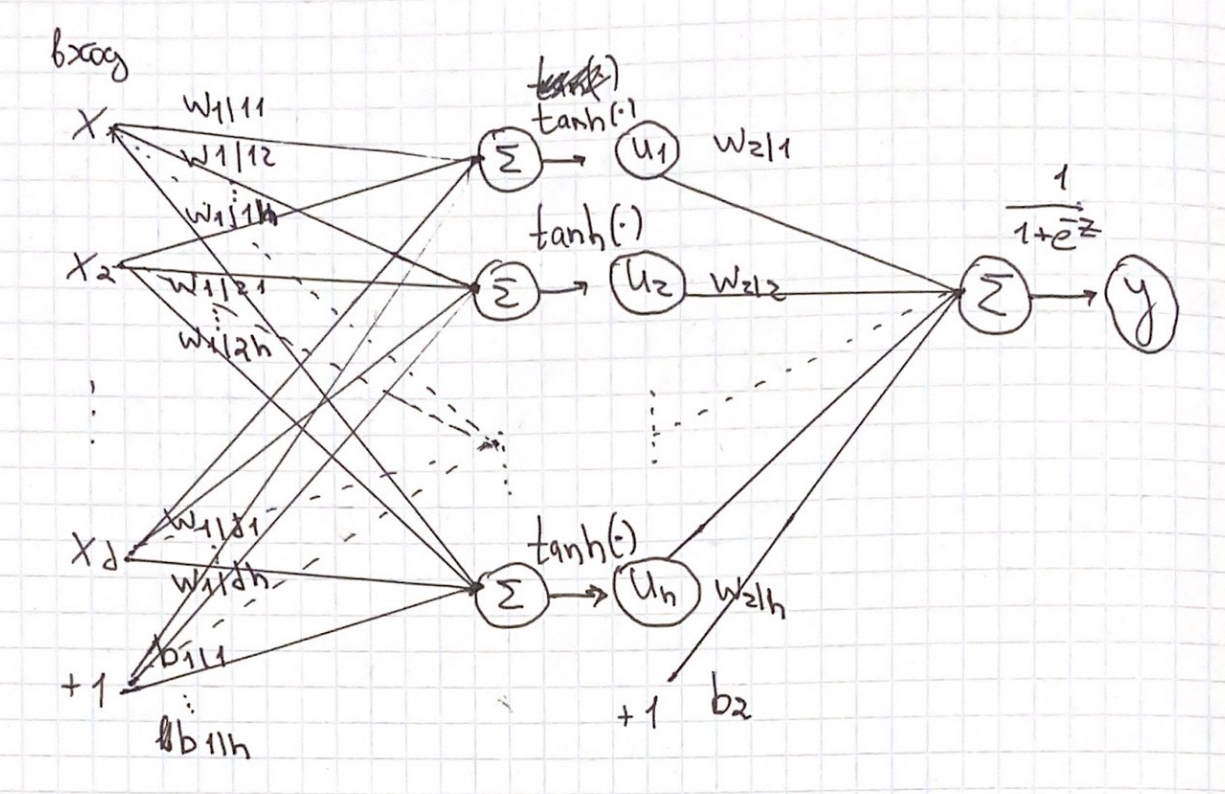

У модели (d + 2) * h + 1 обучаемых параметров

**2.** Дана обучающая выборка $X \in \mathbb{R}^{n \times d}$ — матрица входных данных и $Y \in \{0, 1\}^{n}$ — таргет. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $\mathscr{L}$, в данном случае рассмотрим кросс энтропию
$$\mathscr{L}(\theta) = -\sum_{i=1}^n \big( Y_i \log y_\theta(X_i) + (1-Y_i) \log \left(1-y_\theta(X_i)\right) \big).$$

Наша цель — определить оптимальные параметры нашей модели, минимизируя функцию $\mathscr{L}(\theta)$ на заданном наборе данных. Мы будем решать эту задачу с помощью метода градиентного спуска, который требует вычисления производных по всем параметрам сети. Конечно, в данном случае несложно выписать все производные напрямую, с чем каждый из вас легко сможет справиться.

Однако прямое вычисление производных имеет квадратичную зависимость от количества параметров, что делает его неэффективным. Из-за этого мы не смогли бы быстро обучать глубокие нейронные сети. Хотя в данном случае речь идёт всего лишь о двух слоях, понимание работы методов на простых примерах было бы полезно.

На лекции был рассказан метод **обратного распространения ошибки (back propagation)** и показан его пример для двухслойной нейронной сети (на доске). Выпишите все необходимые производные для применения метода back propagation.


$$ S_1 = XW_1 + b1 $$
$$ U_1 = \tanh(S1) $$
$$ S_2 = U_1W_2 + b2 $$
$$ U_2 = \frac{1}{1 + e^{-S_2}} $$

Нужно найти эти производные для применения метода back propagation 
$$ \frac{\partial L}{\partial S_1}, \frac{\partial L}{\partial U_1}, \frac{\partial L}{\partial S_2}, \frac{\partial L}{\partial U_2}, \frac{\partial L}{\partial W_1}
, \frac{\partial L}{\partial b_1}, \frac{\partial L}{\partial W_2}, \frac{\partial L}{\partial b_2} $$


**3.** Выпишите итоговый алгоритм обратного распространения ошибки для данной нейросети. Нужно записать все необходимые вычисления, включая все итоговые формулы производных. Подробно поясните, почему он имеет линейную сложность.

$$
L = -\sum_{i = 1}^{n} Y_i\log(y(x_i)) + (1 - Y_i)\log(1 - y(x_i)) \\
1) \frac{\partial L}{\partial U_{2|i}} = -(\frac{Y_i}{U_{2|i}} - \frac{1- Y_i}{1 - U_{2|i}}) \\

2) \frac{\partial L}{\partial S_{2|i}} = \frac{\partial L}{\partial U_{2|i}} \cdot \frac{\partial U_{2|i}}{\partial S_{2|i}} = 
\frac{\partial L}{\partial U_{2|i}} \cdot \frac{e^{-S_{2|i}}}{(1 + e^{-S_{2|i}})^2} = 
\frac{\partial L}{\partial U_{2|i}} \cdot \sigma(S_{2|i}) \cdot (1 - \sigma(S_{2|i})) = \frac{\partial L}{\partial U_{2|i}} \cdot U_{2|i} \cdot (1 - U_{2|i}) \\

3) \frac{\partial L}{\partial W_{2|i}} = \sum_{k = 1}^{n} \frac{\partial L}{\partial S_{2|k}} \cdot \frac{\partial S_{2|k}}{\partial W_{2|i}} = 
\sum_{k = 1}^{n} \frac{\partial L}{\partial S_{2|k}} \cdot U_{1|ki} \\

4) \frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial S_2} \cdot \frac{\partial S_2}{\partial b_2} = \sum_{k = 1}^{n} \frac{\partial L}{\partial S_{2|k}} \\

5) \frac{\partial L}{\partial U_{1|ij}} =  \frac{\partial L}{\partial S_{2|i}} \cdot 
\frac{\partial S_{2|i}}{\partial U_{1|ij}} = \frac{\partial L}{\partial S_{2|i}} \cdot W_{2|j} \\

6) \frac{\partial L}{\partial S_{1|ij}} = \frac{\partial L}{\partial U_{1|ij}} \cdot \frac{\partial U_{1|ij}}{\partial S_{1|ij}} = 
\frac{\partial L}{\partial U_{1|ij}} \cdot (1 - \tanh(S_{1|ij})^2) \\

7) \frac{\partial L}{\partial W_{1|ij}} = \sum_{k = 1}^{n} \frac{\partial L}{\partial S_{1|kj}} \cdot 
\frac{\partial S_{1|kj}}{\partial W_{1|ij}} = \sum_{k = 1}^{n} \frac{\partial L}{\partial S_{1|kj}} \cdot X_{ki}; 
\frac{\partial L}{\partial W_1} = X^T \cdot \frac{\partial L}{\partial S_1} \\

8) \frac{\partial L}{\partial b_{1|i}} = \sum_{k = 1}^{n} \frac{\partial L}{\partial S_{1|ki}} \cdot 
\frac{\partial S_{1|ki}}{\partial b_{1|i}} = \sum_{k = 1}^{n} \frac{\partial L}{\partial S_{1|ki}} \\
 
$$ 

Производные вычисляются с в обратном порядке, все вычисление имеет линейную сложность по количеству вычисленных производных так как вычисляя следующую, она вычисляется через предыдущую

**Выводы:**

Метод обратного распространения ошибки позволяет вычислить градиент за $O(n)$ где n - количество вычисленных производных, в то время как прямой подход работает за $O(n^2)$, поэтому рассмотренный метод эффективнее.

**Внимание!** Решение, которое будет иметь сверхлинейную сложность, не будет оценено совсем. Считать производные вы все умеете, задача — вычислять их эффективно алгоритмически.

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

**1.** На практике, чтобы сделать численные вычисления градиентов более стабильными, в качестве функции ошибки используют композицию бинарной кроссэнтропии и сигмоиды, передавая ей логиты в качестве аргументов, то есть выходы последнего линейного слоя. Выведите итоговую формулу градиента бинарной кроссэнтропии по выходу сети до применения сигмоиды.

Из прошлого задания:  
$$
1) \frac{\partial L}{\partial U_{2|i}} = -(\frac{Y_i}{U_{2|i}} - \frac{1- Y_i}{1 - U_{2|i}}) \\

2) \frac{\partial L}{\partial S_{2|i}} = \frac{\partial L}{\partial U_{2|i}} \cdot \frac{\partial U_{2|i}}{\partial S_{2|i}} = 
\frac{\partial L}{\partial U_{2|i}} \cdot \frac{e^{-S_{2|i}}}{(1 + e^{-S_{2|i}})^2} = 
\frac{\partial L}{\partial U_{2|i}} \cdot \sigma(S_{2|i}) \cdot (1 - \sigma(S_{2|i})) = \frac{\partial L}{\partial U_{2|i}} \cdot U_{2|i} \cdot (1 - U_{2|i}) \\

$$
Подставим первое во второе:
$$

\frac{\partial L}{\partial S_{2|i}} = -(\frac{Y_i}{U_{2|i}} + \frac{1- Y_i}{1 - U_{2|i}}) \cdot U_{2|i} \cdot (1 - U_{2|i})
$$


Получим итоговую формулу:  

$$
\frac{\partial L}{\partial S_{2|i}} = U_{2|i} - Y_i = \sigma(S_{2|i}) - Y_i
$$

**2.** Реализуйте класс обучения нейронной сети из задачи 2 в sklearn-стиле, используя только библиотеку `numpy`. Используйте представленный ниже шаблон.

**Особенности:**
* Функция `_backward` должна реализовывать метод back propagation полностью на основе формул из задачи 2. Функция должна *накапливать* градиенты, подробнее см. <a href="https://thetahat.ru/courses/ad/main/4/nn_simple_examples">ноутбук с занятия по нейросетям</a>.
* При реализации функции `_backward` необходимо сразу посчитать производную функции ошибку по выходу сети до применения функции активации, что в коде реализуется функцией `output_gradient`. Это необходимо для повышения стабильности численных вычислений, что также используется в PyTorch. 
* Желательно, чтобы градиент не зависел от размера входных данных, поэтому при вычислении градиентов по параметрам, рекомендуется разделить их на размер батча.
* При необходимости вы можете менять внутреннюю структуру методов, кроме методов `__init__`, `fit`, `predict`, `predict_proba`. В случае изменений исправляйте также документацию и типизацию аргументов, иначе оценка может быть снижена.
* **При реализации класса запрещено пользоваться ИИ-инструментами.** За исключением случаев обновления документации класса при необходимости.

In [101]:
# При реализации класса запрещено пользоваться ИИ-инструментами.


class TwoLayersNNClassifier:
    """Двухслойная нейронная сеть для задачи бинарной классификации.

    Параметры:
        input_size (int): Размер входного вектора.
        hidden_size (int): Количество нейронов в скрытом слое.
        learning_rate (float, optional): Скорость обучения (по умолчанию 0.01).
        n_epoch (int, optional): Количество эпох обучения (по умолчанию 100).
        weight_init_scale (float, optional): Масштаб для инициализации весов (по умолчанию 1).
    """

    def __init__(
        self,
        input_size: int,
        hidden_size: int,
        learning_rate: float = 0.01,
        n_epoch: int = 100,
        weight_init_scale: float = 1,
    ):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.weight_init_scale = weight_init_scale

        # Инициализация весов
        self._initialize_weights()

        # Инициализация градиентов
        self._zero_grad()

        # Для хранения истории потерь
        self.loss_history = []

    def _initialize_weights(self):
        """Инициализирует веса сети случайными значениями."""
        self.W1 = self._init_weight_matrix(self.input_size, self.hidden_size)
        self.b1 = self._init_weight_matrix(1, self.hidden_size)
        self.W2 = self._init_weight_matrix(self.hidden_size, 1)
        self.b2 = self._init_weight_matrix(1, 1)

    def _init_weight_matrix(self, rows: int, cols: int) -> np.ndarray:
        """Инициализирует матрицу весов случайными значениями.

        Параметры:
            rows (int): Количество строк.
            cols (int): Количество столбцов.

        Возвращает:
            np.ndarray: Матрица весов.
        """
        return (np.random.rand(rows, cols) * 2 - 1) * self.weight_init_scale

    @staticmethod
    def tanh_derivative(x: np.ndarray) -> np.ndarray:
        """Вычисляет производную функции гиперболического тангенса.

        Параметры:
            x (np.ndarray): Входной массив.

        Возвращает:
            np.ndarray: Производная функции tanh.
        """
        return 1 - np.tanh(x)**2

    @staticmethod
    def sigmoid(x: np.ndarray, scale: int = 1000) -> np.ndarray:
        """Вычисляет логистическую сигмоиду.

        Параметры:
            x (np.ndarray): Входной массив.
            scale (int, optional): Максимальное абсолютное значение для ограничения (по умолчанию 1000).

        Возвращает:
            np.ndarray: Значения сигмоиды.
        """
        x = np.clip(x, -scale, scale)  # Ограничиваем значения
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def binary_crossentropy(y_pred: np.ndarray, y_true: np.ndarray) -> float:
        """Вычисляет значение бинарной кросс-энтропии.

        Параметры:
            y_pred (np.ndarray): Предсказанные значения до применения сигмоиды (логиты).
            y_true (np.ndarray): Истинные значения (0 или 1).

        Возвращает:
            float: Значение бинарной кросс-энтропии.
        """

        # Вычислите кросс-энтропию
        # Используйте подход с logsumexp (см. ДЗ 3, задача 5)

        loss = np.mean(y_pred + np.logaddexp(0, -y_pred) - y_true * y_pred)
        return loss

    @staticmethod
    def output_gradient(logits: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Вычисляет градиент по выходу сети до применения сигмоиды.

        Параметры:
            logits (np.ndarray): Предсказанные значения.
            y (np.ndarray): Истинные значения.

        Возвращает:
            np.ndarray: Градиент по выходу до применения сигмоиды.
        """

        # Вычислите градиент по выходу сети до применения сигмоиды.
        # Спойлер: получится очень простая формула
        n = len(y)
        return (TwoLayersNNClassifier.sigmoid(logits) - y) / n

    def _forward(self, X: np.ndarray) -> np.ndarray:
        """Выполняет прямой проход по сети.

        Параметры:
            X (np.ndarray): Входные данные.

        Возвращает:
            np.ndarray: Выход сети до применения сигмоиды(логиты).
        """
        self.S1 = X @ self.W1 + self.b1.reshape(1, -1)
        self.U1 = np.tanh(self.S1)
        self.S2 = self.U1 @ self.W2 + self.b2.reshape(1, -1)



        return self.S2

    def _backward(self, X: np.ndarray, y: np.ndarray):
        """Выполняет обратный проход (backpropagation), накапливает градиенты.

        Параметры:
            X (np.ndarray): Входные данные.
            y (np.ndarray): Истинные значения.
        """
        n = X.shape[0]
        d = self.input_size
        h = self.hidden_size

        # Градиент по выходу до применения сигмоиды
        dS2 = self.output_gradient(self._forward(X), y)



        # Градиент по параметрам 2-го слоя
        self.dW2 = dS2.reshape(1, n) @ self.U1.reshape(n, h)
        self.db2 = np.sum(dS2)

        dU1 = dS2.reshape(-1, 1) @ self.W2.reshape(1, -1)

        # Градиент по выходу скрытого слоя
        dS1 = dU1 * self.tanh_derivative(self.S1)

        # Градиент по параметрам 1-го слоя
        self.dW1 = X.T @ dS1
        self.db1 = dS1.sum(axis=0)

    def _step(self):
        """Обновляет веса сети на основе вычисленных градиентов."""

        # Реализуйте шаг градиентного спуска
        self.W1 = self.W1 - self.dW1 * self.learning_rate
        self.b1 = self.b1 - self.db1 * self.learning_rate
        self.W2 = self.W2 - self.dW2.reshape(-1, 1) * self.learning_rate
        self.b2 = self.b2 - self.db2 * self.learning_rate

    def _zero_grad(self):
        """Обнуляет градиенты перед следующим шагом обучения."""
        self.dW1 = np.zeros_like(self.W1)
        self.db1 = np.zeros_like(self.b1)
        self.dW2 = np.zeros_like(self.W2)
        self.db2 = np.zeros_like(self.b2)


    def _show_progress(self, epoch: int, plot_freq: int):
        """Выводит прогресс обучения на каждой итерации.

        Параметры:
            epoch (int): Номер текущей эпохи.
            plot_freq (int): Частота отрисовки графика.
        """
        info_text = f"Эпоха {epoch + 1}/{self.n_epoch}, Лосс: {self.loss_history[-1]:.4f}"

        if plot_freq == 0:
            clear_output(wait=True)  # Очистка вывода
            print(info_text)

        elif (epoch + 1) % plot_freq == 0:
            clear_output(wait=True)  # Очистка вывода
            plt.figure(figsize=(8, 4))
            plt.plot(self.loss_history)
            plt.xlabel("Номер эпохи")
            plt.ylabel("Лосс")
            plt.title(info_text)
            plt.show()

    def fit(self, X: np.ndarray, y: np.ndarray, verbose: bool = True, plot_freq: int = 0):
        """Обучает модель на предоставленных данных.

        Параметры:
            X (np.ndarray): Входные данные.
            y (np.ndarray): Истинные значения (0 или 1).
            verbose (bool, optional): Если True, выводит прогресс обучения (по умолчанию True).
            plot_freq (int, optional): Частота отрисовки графика.
                    Если 0, график не рисуется (по умолчанию 0).
        """
        y = y[:, None]  # Преобразуем y в вектор-столбец (n, 1)
        self.loss_history = []  # Очистка истории потерь перед обучением

        for epoch in range(self.n_epoch):
            # Обнуляем градиенты перед каждой эпохой
            self._zero_grad()
            
            # Прямой проход по сети
            logits = self._forward(X)
            
            # Вычисляем потери
            loss = self.binary_crossentropy(logits, y)
            self.loss_history.append(loss)  # Сохраняем значение потерь

            # Обратный проход (вычисление градиентов)
            self._backward(X, y)
            
            # Обновление весов
            self._step()

            # Вывод прогресса
            if verbose:
                self._show_progress(epoch, plot_freq)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Предсказывает классы для входных данных.

        Параметры:
            X (np.ndarray): Входные данные.

        Возвращает:
            np.ndarray: Предсказанные классы (0 или 1).
        """
        # Получаем логиты (выход перед сигмоидой)
        logits = self._forward(X)
        # Применяем сигмоиду и пороговое преобразование
        y_pred = self.sigmoid(logits)
        return (y_pred > 0.5).astype(int)  # Порог 0.5 для бинарной классификации

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """Возвращает вероятности принадлежности к классам 0 и 1.

        Параметры:
            X (np.ndarray): Входные данные.

        Возвращает:
            np.ndarray: Матрица вероятностей формы (n, 2), где n — количество объектов.
                    Первый столбец — вероятность класса 0, второй — класса 1.
        """
        # Получаем логиты (выход перед сигмоидой)
        logits = self._forward(X)
        # Вычисляем вероятность класса 1 (применяем сигмоиду)
        prob_class_1 = self.sigmoid(logits)
        # Вероятность класса 0 равна 1 - P(class=1)
        prob_class_0 = 1 - prob_class_1
        # Объединяем в матрицу (n, 2)
        return np.hstack((prob_class_0, prob_class_1))

**3.** Сгенерируем искусственные данные

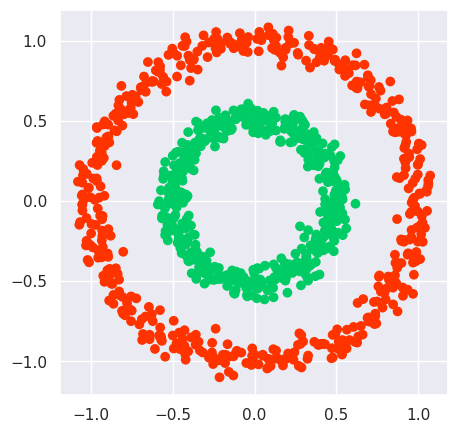

In [48]:
# Генерация данных
n_samples = 1024
X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

# Визуализация данных
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
plt.show()

Обучите реализованную ранее нейросеть решать задачу классификации на основе этой выборки.

*Периодически во время обучения рисуйте график лосса. Если он возрастает, стоит поискать ошибку.*

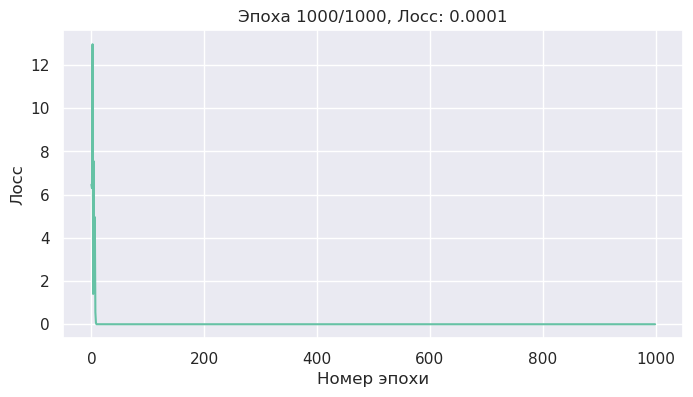

In [ ]:
model = TwoLayersNNClassifier(
    input_size=2,       # 2 признака (x и y координаты)
    hidden_size=100,      # 100 нейронов в скрытом слое
    learning_rate=1,   # Увеличиваем learning rate для сложных данных
    n_epoch=1000,       # Больше эпох для сложной задачи
    weight_init_scale=4  # Меньше масштаб для инициализации
)

# Обучаем с визуализацией прогресса каждые 100 эпох
model.fit(X, y, verbose=True, plot_freq=100)

С помощью функции `np.meshgrid` создайте двухмерную сетку в диапазоне $[-1.5, 1.5]$ по каждой координате с шагом не более $0.02$. Для каждой точки сетки посчитайте оценки вероятностей принадлежности тому или иному классу. 

In [51]:
# Создаем сетку в диапазоне [-1.5, 1.5] с шагом 0.02
h = 0.02  # Шаг сетки
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Объединяем координаты в матрицу (n, 2)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Вычисляем вероятности для каждой точки сетки
Z = model.predict_proba(grid_points)[:, 1]  # Берем вероятности класса 1
Z = Z.reshape(xx.shape)  # Возвращаем к форме сетки

Визуализируйте полученные предсказания классов и вероятностей.

*Если у вас получилось плохое качество, попробуйте увеличить количество нейронов. Если не помогает, возможно, где-то ошибка.*

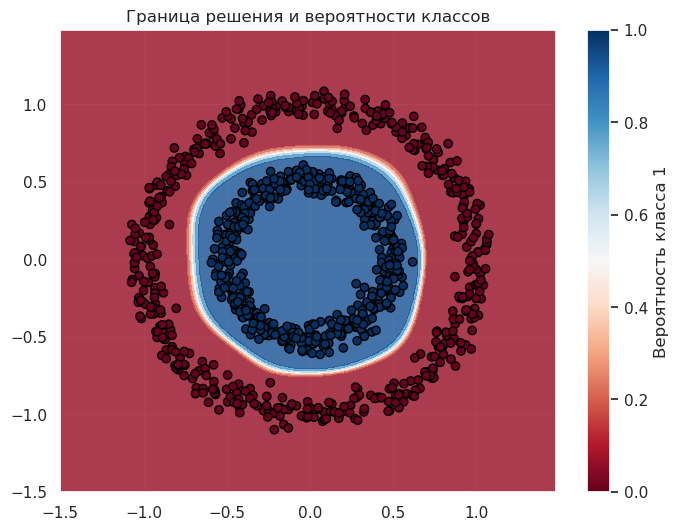

In [52]:
# Визуализация
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Граница решения и вероятности классов")
plt.colorbar(label="Вероятность класса 1")
plt.show()

Немного увеличим разброс данных

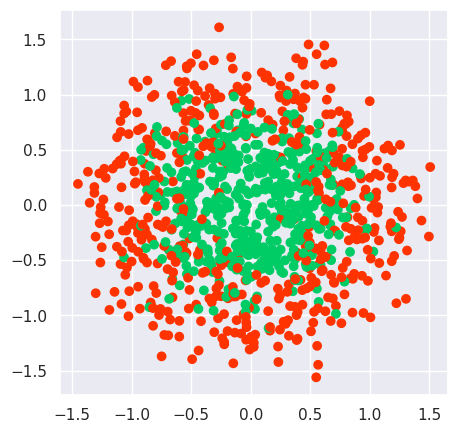

In [53]:
# Генерация данных
n_samples = 1024
X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.25)

# Визуализация данных
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
plt.show()

Повторите те же действия с новыми данными.

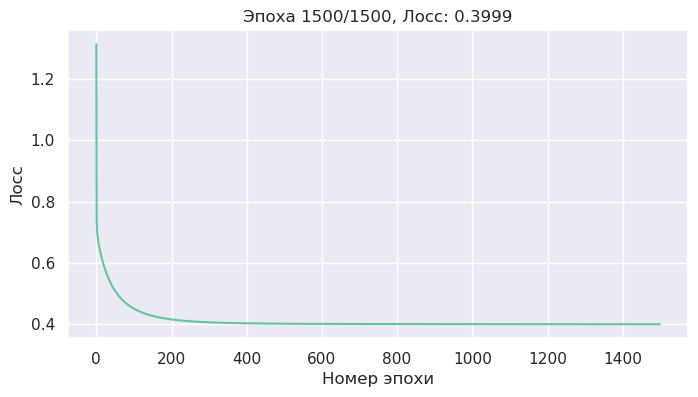

In [83]:
model1 = TwoLayersNNClassifier(
    input_size=2,       # 2 признака (x и y координаты)
    hidden_size=100,      # 10 нейронов в скрытом слое
    learning_rate=0.2,   # Увеличиваем learning rate для сложных данных
    n_epoch=1500,       # Больше эпох для сложной задачи
    weight_init_scale=1  # Меньше масштаб для инициализации
)

# Обучаем с визуализацией прогресса каждые 100 эпох
model1.fit(X, y, verbose=True, plot_freq=250)

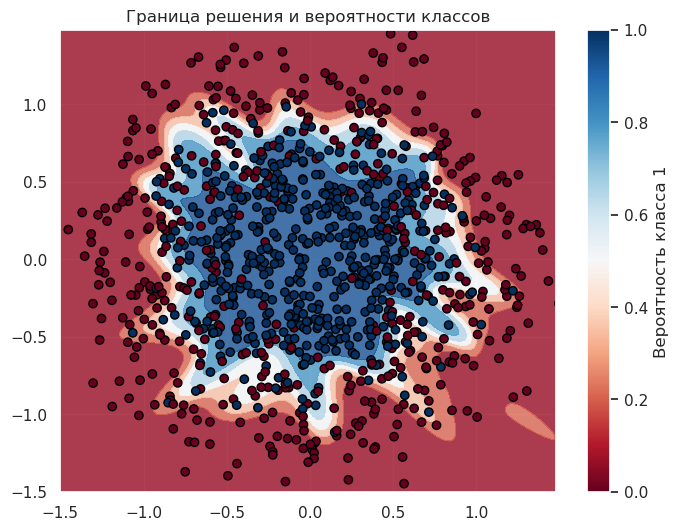

In [84]:
# Создаем сетку в диапазоне [-1.5, 1.5] с шагом 0.02
h = 0.02  # Шаг сетки
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Объединяем координаты в матрицу (n, 2)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Вычисляем вероятности для каждой точки сетки
Z = model.predict_proba(grid_points)[:, 1]  # Берем вероятности класса 1
Z = Z.reshape(xx.shape)  # Возвращаем к форме сетки

# Визуализация
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Граница решения и вероятности классов")
plt.colorbar(label="Вероятность класса 1")
plt.show()

При смене параметров в model1 мне не удалось опустить loss ниже чем 0.4, скорее всего это связано с тем, что на обучающих данных область красных и зеленых точек пересекаются.

**Выводы:**

При обучении модели на первых и вторых данных удалось добиться L = 0.0001 и L = 0.4 соответственно. Во втором случае при смене параметров лосс не опускался ниже чем 0.4, это связано с тем, что в этом случае обучающие данные пересекаются, а в первом нет, поэтому в первом случае удалось добиться почти нулевого лосса. Также визуализация полученных предсказаний показывает, что модели хорошо предсказывают.

**4.** Теперь давайте применим нашу нейронную сеть к данным MNIST.

Загрузите данные. Для этого воспользуйтесь кодом из задачи 1. Обратите внимание, что поскольку наша сеть реализована на `numpy` и принимает `numpy`-матрицы, потребуется предварительно перевести `torch`-тензоры в `numpy`-массивы.

Поскольку наша сеть была разработана для бинарной классификации, мы будем рассматривать изображения, на которых представлены только две цифры: `0` и `1`. Возьмите по 1000 изображений каждого символа и преобразуйте их в векторы. Также выделите изображения из тестовой выборки, соответствующие этим цифрам.

In [87]:
# 1. Загрузка и подготовка данных MNIST
def load_mnist():
    transform = transforms.Compose([transforms.ToTensor()])
    train_set = MNIST(root='./data', train=True, download=True, transform=transform)
    test_set = MNIST(root='./data', train=False, download=True, transform=transform)
    
    train_images = train_set.data.numpy()
    train_labels = train_set.targets.numpy()
    test_images = test_set.data.numpy()
    test_labels = test_set.targets.numpy()
    
    return train_images, train_labels, test_images, test_labels

# Загрузка данных
train_images, train_labels, test_images, test_labels = load_mnist()

print("Original train shape:", train_images.shape, train_labels.shape)
print("Original test shape:", test_images.shape, test_labels.shape)

# 2. Выборка только 0 и 1
def filter_binary_digits(images, labels, num_samples=1000):
    # Выбираем индексы для 0 и 1
    mask_0 = (labels == 0)
    mask_1 = (labels == 1)
    
    # Берем первые num_samples примеров каждого класса
    indices_0 = np.where(mask_0)[0][:num_samples]
    indices_1 = np.where(mask_1)[0][:num_samples]
    
    # Объединяем
    selected_indices = np.concatenate([indices_0, indices_1])
    np.random.shuffle(selected_indices)
    
    # Возвращаем данные и метки
    binary_images = images[selected_indices]
    binary_labels = labels[selected_indices]
    
    # Преобразуем изображения в векторы и нормализуем
    binary_images = binary_images.reshape(-1, 28*28) / 255.0
    
    return binary_images, binary_labels

# Применяем фильтрацию
X_train, y_train = filter_binary_digits(train_images, train_labels, 1000)
X_test, y_test = filter_binary_digits(test_images, test_labels, 200)  # Возьмем меньше тестовых данных

print("\nFiltered train shape:", X_train.shape, y_train.shape)
print("Filtered test shape:", X_test.shape, y_test.shape)

Original train shape: (60000, 28, 28) (60000,)
Original test shape: (10000, 28, 28) (10000,)

Filtered train shape: (2000, 784) (2000,)
Filtered test shape: (400, 784) (400,)


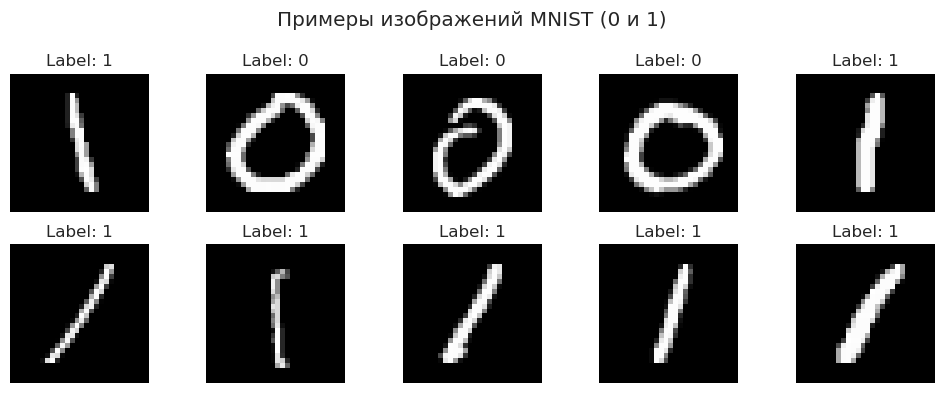

In [88]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Примеры изображений MNIST (0 и 1)")
plt.tight_layout()
plt.show()

Обучите реализованную ранее нейронную сеть к этим данным.


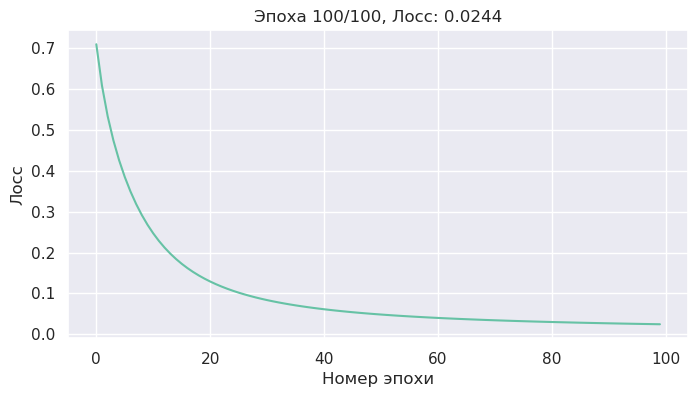

Модель обучилась за 8.936851501464844 секунд


In [ ]:
model_mnist = TwoLayersNNClassifier(
    input_size=28*28,    # Размер вектора изображения
    hidden_size=128,      # Увеличим скрытый слой
    learning_rate=0.05,  # Уменьшим learning rate
    n_epoch=100,        # Количество эпох
    weight_init_scale=0.1
)

# Обучаем модель
start = time()
model_mnist.fit(X_train, y_train, verbose=True, plot_freq=10)
end = time()
print(f"Модель обучилась за {end - start} секунд")

Посчитайте качество обученной нейросети на тестовой выборке. Можете ли вы сказать, насколько хорошо сеть обучилась?

In [99]:
y_test_pred = model_mnist.predict(X_test)
print(f"Качество обученной нейросети - {accuracy_score(y_test, y_test_pred) * 100}%")

Качество обученной нейросети - 100.0%


Сеть обучилась очень хорошо, так как все числа предсказывает верно, то есть точность предсказания равна 100%

**Выводы:**

Данная модель точно определяет числа 0 и 1, также для этого ей понадобилось всего 9 секунд, что значительно быстрее чем в первой части задания

---
### Задача 4.

Рассмотрим глубокую нейронную сеть, которая
* принимает на вход $x\in\mathbb{R}^d$,
* возвращает $y\in\{0, 1\}$,
* содержит $99$ полносвязных слоев (`Linear`) с функцией активации $\tanh$, за исключением последнего слоя,
* последний слой использует функцию активации логистическая сигмоида.

В качестве лосса $\mathscr{L}(\theta)$ возьмем кросс-энтропию.

**1.** Распишите градиент лосса по весам первого слоя $W_1$. Какова сложность этой операции?

$$
\frac{\partial L}{\partial S_{100}} = \sigma(S_{100}) - Y \\

\frac{\partial L}{\partial U_{99}} = \frac{\partial L}{\partial S_{100}} \cdot W_{100}^T ; 
\frac{\partial L}{\partial S_{99|ij}} = \frac{\partial L}{\partial U_{99|ij}} \cdot (1 - \tanh(S_{99|ij})^2) \\

\frac{\partial L}{\partial U_{98}} = \frac{\partial L}{\partial S_{99}} \cdot W_{99}^T ; 
\frac{\partial L}{\partial S_{98|ij}} = \frac{\partial L}{\partial U_{98|ij}} \cdot (1 - \tanh(S_{98|ij})^2) \\
\vdots \\

\frac{\partial L}{\partial U_{1}} = \frac{\partial L}{\partial S_{2}} \cdot W_{2}^T ; 
\frac{\partial L}{\partial S_{1|ij}} = \frac{\partial L}{\partial U_{1|ij}} \cdot (1 - \tanh(S_{1|ij})^2) \\

\frac{\partial L}{\partial W_1} = X^T \cdot \frac{\partial L}{\partial S_1}

$$

Сложность $O(n)$ , где n кол-во слоев, в нашем случае это 100.

Нарисуйте график функции активации и ее производной.

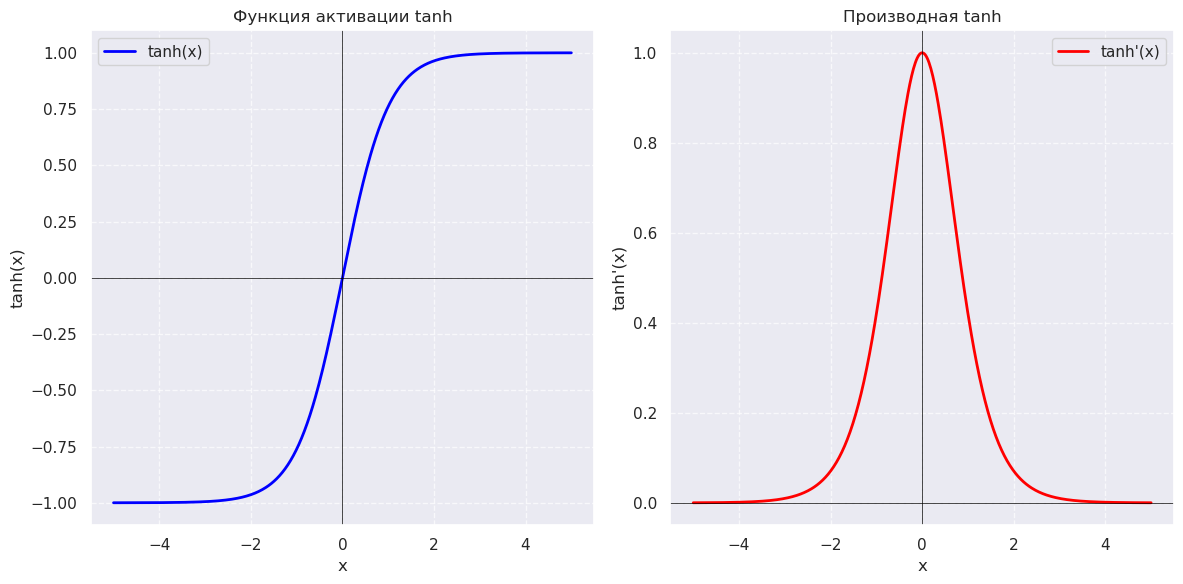

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем диапазон значений
x = np.linspace(-5, 5, 500)

# Функция tanh и её производная
tanh = np.tanh(x)
tanh_derivative = 1 - np.tanh(x)**2

# Создаем график
plt.figure(figsize=(12, 6))

# График tanh
plt.subplot(1, 2, 1)
plt.plot(x, tanh, label='tanh(x)', color='blue', linewidth=2)
plt.title('Функция активации tanh')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.legend()

# График производной tanh
plt.subplot(1, 2, 2)
plt.plot(x, tanh_derivative, label="tanh'(x)", color='red', linewidth=2)
plt.title('Производная tanh')
plt.xlabel('x')
plt.ylabel("tanh'(x)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()

На основе графика проанализируйте, что будет происходить с градиентом по весам первого слоя, если нейросеть "ненулевая", иначе говоря, на промежуточных слоях может выдавать различные значения, в том числе довольно большие.

Градиент по весам первого слоя будет очень мал, что сделает обучение сложным

**2.** Реализуйте эту нейросеть на **PyTorch**.

*Примечание.* Каждый слой должен быть инициализирован отдельно. Нельзя создавать копии уже инициализированного слоя.

In [110]:
def make_model(input_dim, hidden_dim, output_dim):
    layers = []
    layers.append(nn.Linear(input_dim, hidden_dim))
    layers.append(nn.Tanh())

    for i in range(98):
        layers.append(nn.Linear(hidden_dim, hidden_dim))
        layers.append(nn.Tanh())

    layers.append(nn.Linear(hidden_dim, output_dim))
    layers.append(nn.Sigmoid())

    model = nn.Sequential(*layers)
    return model




Аналогично задаче 3 попробуйте обучить эту нейросеть для классификации изображений с цифрами 0 и 1 из датасета MNIST. Скорее всего весь датасет не поместится в память, поэтому предлагается использовать случайную подвыборку (батч) размера 32 на каждом шаге обучения.

In [143]:
from torchvision import datasets, transforms

# 1. Загрузка данных (без преобразования в numpy)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

def filter_binary_test(test_data):
    # Создаем маску для 0 и 1
    test_mask = (test_data.targets == 0) | (test_data.targets == 1)
    
    # Применяем маску к данным
    X_test = test_data.data[test_mask]  # torch.Tensor [N, 28, 28]
    y_test = test_data.targets[test_mask]  # torch.Tensor [N]
    
    # Нормализация и преобразование в [N, 784]
    X_test = X_test.float() / 255.0  # Нормализация [0, 1]
    X_test = X_test.reshape(-1, 28*28)  # Преобразуем в [N, 784]
    
    return X_test, y_test

X_test, y_test = filter_binary_test(test_data)






# 2. Фильтрация только 0 и 1 (ленивая, без загрузки в память)
class BinaryMNIST:
    def __init__(self, dataset):
        self.dataset = dataset
        self.indices = [i for i, (_, label) in enumerate(dataset) if label in [0, 1]]
    
    def __len__(self):
        return len(self.indices)
    
    def __getitem__(self, idx):
        return self.dataset[self.indices[idx]]

binary_train = BinaryMNIST(train_data)

# 3. Функция для получения батча
def get_batch(dataset, batch_size=32):
    indices = torch.randperm(len(dataset))[:batch_size]
    images = torch.stack([dataset[i][0] for i in indices])
    labels = torch.tensor([dataset[i][1] for i in indices])
    return images.reshape(-1, 28*28), labels.float()  # Метки как float для BCELoss

In [127]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)
optim_func = nn.BCELoss()

In [155]:
def show_progress(results):
    clear_output(wait=True)  # Очистка предыдущего вывода для плавного обновления
    plt.style.use('ggplot')  # Использование стиля 'ggplot' для графиков

    # Извлечение данных для построения графика
    train_accuracy = results["train_accuracy"]  # Точность на тренировочной выборке
    test_accuracy = results["test_accuracy"]    # Точность на тестовой выборке
    iterations = range(len(train_accuracy))    # Номера итераций

    # Создание графика
    plt.figure(figsize=(12, 6))

    # Построение графика точности на тренировочной выборке
    plt.scatter(iterations, train_accuracy, label="Тренировочная выборка", marker=".")

    # Построение графика точности на тестовой выборке
    plt.scatter(iterations, test_accuracy, label="Тестовая выборка", marker=".")

    # Настройка осей и заголовка
    plt.xlabel("Итерация")
    plt.ylabel("Точность")
    plt.title("Зависимость точности от итерации")
    plt.legend()  # Добавление легенды
    plt.grid(True)  # Включение сетки

    # Установка пределов оси X для лучшей визуализации
    plt.xlim(-10, 30)

    # Отображение графика
    plt.show()

In [131]:
def get_random_batch(dataset, batch_size=32):
    indices = torch.randint(0, len(dataset), (batch_size,))
    images = torch.stack([dataset[i][0] for i in indices])
    labels = torch.tensor([dataset[i][1] for i in indices])
    return images, labels

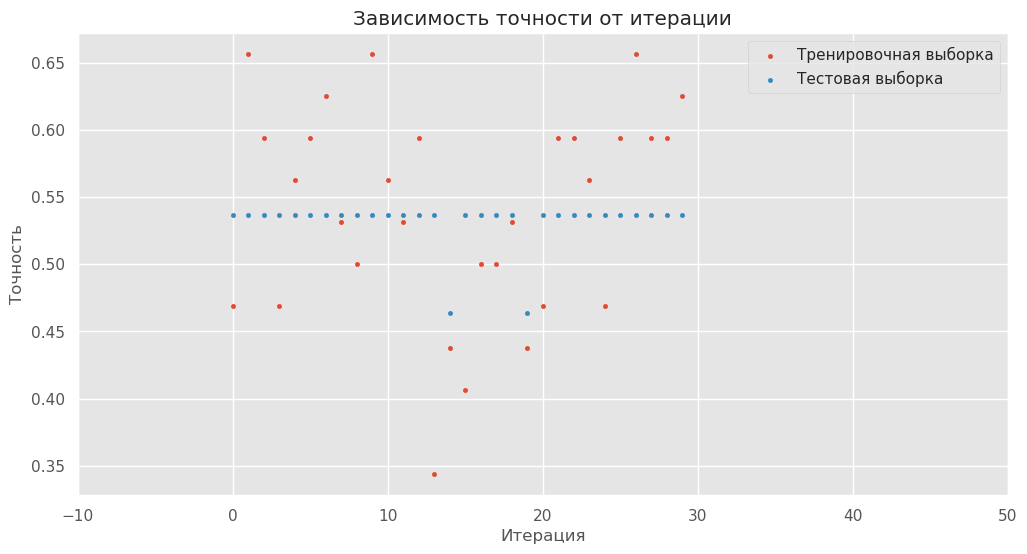

In [ ]:
num_iter = 30
model = make_model(28*28, 64, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)
optim_func = nn.BCELoss()

# Словарь для сохранения результатов
results = {
    "train_accuracy": [],
    "test_accuracy": [],
    "grad_stats": []  # Для хранения статистики градиентов
}

for i in range(num_iter):
    X_train, y_train = get_batch(binary_train)
    
    # Прямой проход
    y_pred_proba_train = model(X_train).squeeze()
    
    # Вычисление потерь
    loss = optim_func(y_pred_proba_train, y_train.float())
    
    # Обратный проход
    optimizer.zero_grad()
    loss.backward()
    
    # Сбор статистики градиентов перед шагом оптимизации
    grad_stats = []
    layer_idx = 0  # Счетчик слоев
    for name, param in model.named_parameters():
        if param.grad is not None:
            abs_grad = param.grad.abs()
            grad_stats.append({
                'layer': layer_idx,
                'mean': abs_grad.mean().item(),
                'max': abs_grad.max().item()
            })
            # Увеличиваем счетчик только для весов (пропускаем bias)
            if 'bias' not in name:
                layer_idx += 1
    
    results["grad_stats"].append(grad_stats)
    
    # Шаг оптимизации
    optimizer.step()
    
    # Оценка точности
    with torch.no_grad():
        y_pred_train = (y_pred_proba_train > 0.5).float()
        y_pred_test = (model(X_test).squeeze() > 0.5).float()
        
    results["train_accuracy"].append(accuracy_score(y_train, y_pred_train))
    results["test_accuracy"].append(accuracy_score(y_test, y_pred_test))
    
    if (i + 1) % 10 == 0:
        show_progress(results)

Постройте график зависимости среднего и максимального абсолютного значения градиента по весам для каждого слоя от номера слоя.

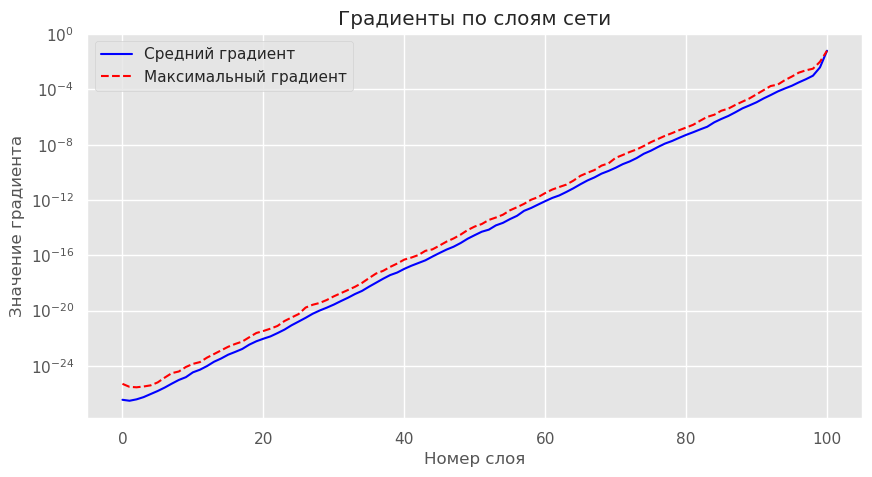

In [156]:
# Агрегация данных по слоям
layer_stats = {}
for grad_stats in results["grad_stats"]:
    for stat in grad_stats:
        layer = stat['layer']
        if layer not in layer_stats:
            layer_stats[layer] = {'mean': [], 'max': []}
        layer_stats[layer]['mean'].append(stat['mean'])
        layer_stats[layer]['max'].append(stat['max'])

# Усреднение по итерациям
layers = sorted(layer_stats.keys())
mean_grads = [torch.mean(torch.tensor(layer_stats[l]['mean'])).item() for l in layers]
max_grads = [torch.mean(torch.tensor(layer_stats[l]['max'])).item() for l in layers]

# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(layers, mean_grads, 'b-', label='Средний градиент')
plt.plot(layers, max_grads, 'r--', label='Максимальный градиент')
plt.xlabel('Номер слоя')
plt.ylabel('Значение градиента')
plt.title('Градиенты по слоям сети')
plt.yscale('log')  # Логарифмическая шкала для наглядности
plt.legend()
plt.grid(True)
plt.show()

**Выводы:**

Из графика градиента от слоев видно, градиент стремится к нулю при умеьшении слоя, это ухудшает обучение модели, так как веса практически не обновляются. По графику зависимости точности предсказания от итерации как раз таки видно, что модель не обучается, точность на тренировочной выборке сильно скачет, а на тестовой она везде примерно равна 54%, что говорит о плохом обучении

*Примечание.* Подобная ситуация известна как "паралич" нейросети. Именно поэтому такие функции активации, как ReLU, стали очень популярными. Для преодоления этого паралича существует множество методов, многие из которых мы рассмотрим на 3 курсе.